In [1]:
import os

# Replace with your actual name
candidate_name = "ujjwal"  # 👈 Change this as needed
root_dir = f"ds_{candidate_name}"

# Define the full folder structure
folders = [
    root_dir,
    f"{root_dir}/csv_files",
    f"{root_dir}/outputs"
]

# Create folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print(f"Folder structure created inside: {root_dir}")


Folder structure created inside: ds_ujjwal


In [3]:
from google.colab import files
uploaded = files.upload()  # This will let you upload files manually

# Move uploaded files to the csv_files directory
import shutil

for filename in uploaded.keys():
    shutil.move(filename, f"{root_dir}/csv_files/{filename}")

print("Files uploaded and moved to csv_files folder.")


Saving fear_greed_index.csv to fear_greed_index.csv
Files uploaded and moved to csv_files folder.


In [4]:
import pandas as pd

# Automatically find the uploaded CSVs
csv_folder = f"{root_dir}/csv_files"
csv_files = os.listdir(csv_folder)
print(f"📂 Files in csv_files/: {csv_files}")

📂 Files in csv_files/: ['fear_greed_index.csv', 'historical_data.csv']


In [5]:
df1 = pd.read_csv(f"{csv_folder}/{csv_files[0]}")
df2 = pd.read_csv(f"{csv_folder}/{csv_files[1]}")

In [6]:
print("\n🧾 Dataset 1 (Likely: Fear-Greed Index)")
display(df1.head())


🧾 Dataset 1 (Likely: Fear-Greed Index)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
print("\n📊 Dataset 2 (Likely: Historical Trader Data)")
display(df2.head())


📊 Dataset 2 (Likely: Historical Trader Data)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [21]:
print(" Trader DataFrame Columns:")
print(trader_df.columns.tolist())

print("\n Fear-Greed DataFrame Columns:")
print(fear_greed_df.columns.tolist())

 Trader DataFrame Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']

 Fear-Greed DataFrame Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']


In [25]:
#  Step 1: Reload Original CSVs (if needed)
# If you already loaded df1 and df2, skip this block

#  Step 2: Auto-detect which file is which
# One has columns: ['timestamp', 'value', 'classification', 'date'] → fear_greed_df
# One has columns: ['Execution Price', 'Size USD', ...] → trader_df

if 'classification' in df1.columns:
    fear_greed_df = df1
    trader_df = df2
elif 'classification' in df2.columns:
    fear_greed_df = df2
    trader_df = df1
else:
    raise ValueError(" Neither file contains 'classification'. Can't detect sentiment dataset.")

#  Step 3: Clean fear_greed_df (sentiment)
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce').dt.date
fear_greed_df['Sentiment'] = fear_greed_df['classification'].map({'Fear': 0, 'Greed': 1})
fear_greed_df = fear_greed_df[['date', 'Sentiment']].dropna()

# Step 4: Clean trader_df (trades)
timestamp_col = 'Timestamp IST' if 'Timestamp IST' in trader_df.columns else 'Timestamp'
trader_df[timestamp_col] = pd.to_datetime(trader_df[timestamp_col], errors='coerce')
trader_df['date'] = trader_df[timestamp_col].dt.date

numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    if col in trader_df.columns:
        trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

trader_df = trader_df.dropna(subset=['date'])

#  Step 5: Merge on 'date'
merged_df = pd.merge(trader_df, fear_greed_df, on='date', how='left')

print(f" Merge completed! Merged dataset shape: {merged_df.shape}")
display(merged_df.head())


 Merge completed! Merged dataset shape: (79225, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.0


/tmp/ipython-input-26-1567134642.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


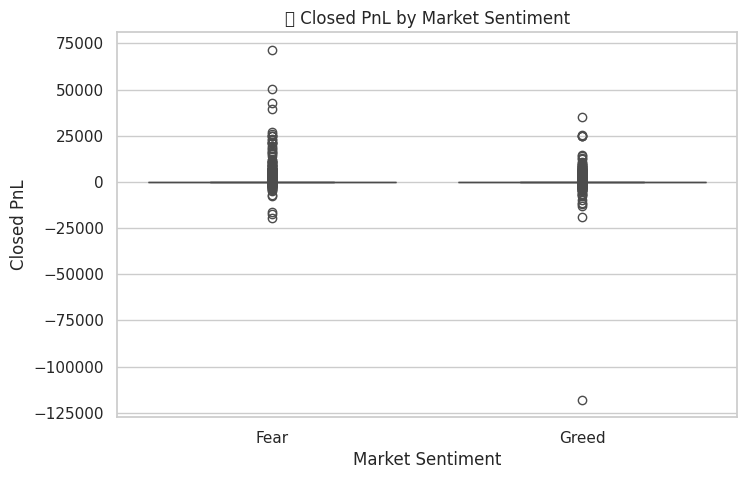

 Plot saved to ds_ujjwal/outputs/closed_pnl_vs_sentiment.png


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup styling
sns.set(style="whitegrid")

# Plot: Closed PnL vs Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("📈 Closed PnL by Market Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Market Sentiment")

# Save to outputs/
output_path = f"{root_dir}/outputs/closed_pnl_vs_sentiment.png"
plt.savefig(output_path)
plt.show()
print(f" Plot saved to {output_path}")

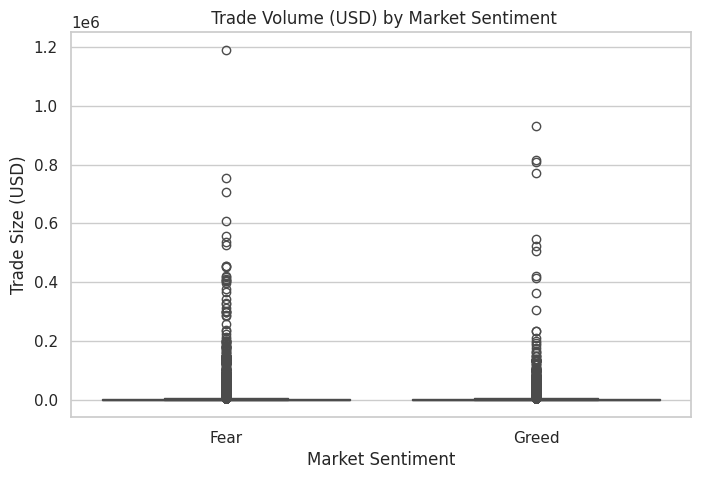

 Plot saved to ds_ujjwal/outputs/volume_vs_sentiment.png


In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Sentiment', y='Size USD')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title(" Trade Volume (USD) by Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.xlabel("Market Sentiment")

output_path = f"{root_dir}/outputs/volume_vs_sentiment.png"
plt.savefig(output_path)
plt.show()
print(f" Plot saved to {output_path}")


In [28]:
if 'Leverage' in merged_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=merged_df, x='Sentiment', y='Leverage')
    plt.xticks([0, 1], ['Fear', 'Greed'])
    plt.title(" Leverage by Market Sentiment")
    plt.ylabel("Leverage")
    plt.xlabel("Market Sentiment")

    output_path = f"{root_dir}/outputs/leverage_vs_sentiment.png"
    plt.savefig(output_path)
    plt.show()
    print(f" Plot saved to {output_path}")
else:
    print(" 'Leverage' column not found — skipping leverage analysis.")


 'Leverage' column not found — skipping leverage analysis.
